In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import sys
import xarray as xr
import xesmf as xe
import h5py
from u import *

# read and regrid India mask file

In [2]:
ds_in = xr.open_dataset("/net/d14/data/geoschem/forward/ExtData/HEMCO/MASKS/v2019-05/India_mask.generic.1x1.nc")
nested_grid_with_bounds = {'lon': np.arange(60.05, 150, 0.1),
                           'lat': np.arange(-10.95, 55, 0.1),
                           'lon_b': np.arange(60.05-0.1/2, 150+0.1/2, 0.1),
                           'lat_b': np.arange(-10.95-0.1/2, 55+0.1/2, 0.1),
                          }

global_grid_with_bounds = {'lon': ds_in['lon'].values,
                           'lat': ds_in['lat'].values,
                           'lon_b': np.arange(-179.5-1/2, 180+1/2, 1),
                           'lat_b': np.arange(-89.5-1/2, 90+1/2, 1), 
                          }

regridder_conserve = xe.Regridder(global_grid_with_bounds, nested_grid_with_bounds, method='conservative')

In [3]:
mask_out = regridder_conserve(ds_in['MASK']).isel(time=0)
mask_in = ds_in['MASK'].isel(time=0)
print('Mask in shape: '+str(mask_in.shape))
print('Mask out shape: '+str(mask_out.shape))

Mask in shape: (180, 360)
Mask out shape: (660, 900)


In [17]:
color = plt.cm.Blues

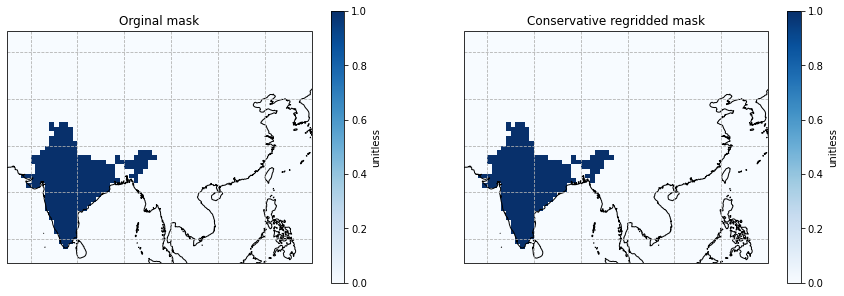

In [23]:
fig, axes = plt.subplots(1, 2, figsize=[15, 10], subplot_kw={'projection': ccrs.PlateCarree()})

# Plot global data on the left side
mask_in.plot(ax=axes[0], cmap=color, cbar_kwargs={'shrink': 0.5, 'label': 'unitless'})
axes[0].set_title('Orginal mask')
axes[0].set_extent([65.0, 130.0, 5.0, 50])

# Plot nested on on the right side
mask_out.plot(ax=axes[1], cmap=color, cbar_kwargs={'shrink': 0.5, 'label': 'unitless'})
axes[1].set_title('Conservative regridded mask')
axes[1].set_extent([65.0, 130.0, 5.0, 50])

for ax in axes:
    ax.coastlines()
    ax.gridlines(linestyle='--')

In [25]:
mask_out.to_netcdf('/home/rlan/inventory/India_mask_0.1x0.1.nc')

In [27]:
mask = xr.open_dataset('/home/rlan/inventory/India_mask_0.1x0.1.nc')

In [28]:
mask

<xarray.Dataset>
Dimensions:  (lat: 660, lon: 900)
Coordinates:
    time     datetime64[ns] ...
  * lon      (lon) float64 60.05 60.15 60.25 60.35 ... 149.7 149.8 149.9 150.0
  * lat      (lat) float64 -10.95 -10.85 -10.75 -10.65 ... 54.75 54.85 54.95
Data variables:
    MASK     (lat, lon) float64 ...

In [25]:
ds_in = xr.open_dataset('/net/d14/data/geoschem/forward/ExtData/HEMCO/MASKS/v2019-05/India_mask.generic.1x1.nc')
nested_grid_with_bounds = {'lon': np.arange(60, 150.5, 0.625),
                           'lat': np.arange(-11, 55.5, 0.5),
                           'lon_b': np.arange(60-0.625/2, 150.5+0.625/2, 0.625),
                           'lat_b': np.arange(-11-0.5/2, 55.5+0.5/2, 0.5),
                          }

global_grid_with_bounds = {'lon': ds_in['lon'].values,
                           'lat': ds_in['lat'].values,
                           'lon_b': np.arange(-179.5-1/2, 180+1/2, 1),
                           'lat_b': np.arange(-89.5-1/2, 90+1/2, 1), 
                          }

regridder_conserve = xe.Regridder(global_grid_with_bounds, nested_grid_with_bounds, method='conservative')

In [26]:
mask_out = regridder_conserve(ds_in['MASK']).isel(time=0)
print('Mask out shape: '+str(mask_out.shape))
mask_out.to_netcdf('/home/rlan/inventory/India_mask_0.625x0.5.nc')

Mask out shape: (133, 145)


# read and regrid India area file

In [3]:
f = h5py.File('/home/rlan/inventory/GFED4.1s_2020_beta.hdf5', 'r')

In [4]:
list(f.keys())

['ancill', 'emissions', 'lat', 'lon']

In [5]:
area25 = f['/ancill/grid_cell_area']
area25 = xr.DataArray(np.array(area25))

In [6]:
area25.sum()

<xarray.DataArray ()>
array(5.0928195e+14, dtype=float32)

In [51]:
area25.to_netcdf('/home/rlan/inventory/area25_global.nc')
ds = xr.open_dataset('/home/rlan/inventory/area25_global.nc')
ds['area25'] = ds['__xarray_dataarray_variable__']
ds = ds.drop(['__xarray_dataarray_variable__'])
ds.to_netcdf('/home/rlan/inventory/area25.nc')

# Read and regrid Nepal, Bangladesh and Pakistan shape file

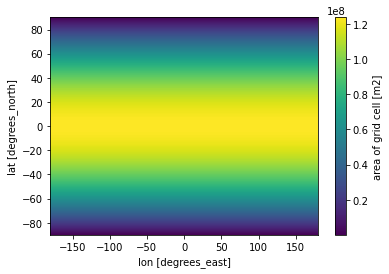

In [7]:
ds = xr.open_dataset("/home/rlan/inventory/countrymask_0.1x0.1.nc")
ds['cell_area'].plot()

In [8]:
ds['cell_area'].sum()

<xarray.DataArray 'cell_area' ()>
array(5.10064472e+14)

In [17]:
area01 = ds['cell_area']
area01.to_netcdf('/home/rlan/inventory/area01.nc')

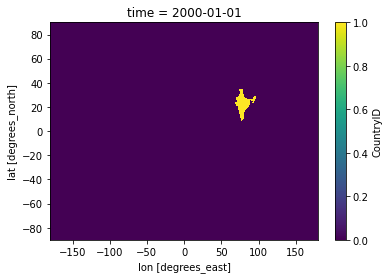

In [18]:
India_mask = (ds['CountryID'].isel(time=0) == 356)
India_mask.plot()

In [19]:
India_mask = (ds['CountryID'].isel(time=0) == 356)
India_mask.to_netcdf('/home/rlan/inventory/India_mask_0.1x0.1.nc')

In [77]:
Bangladesh_mask = (ds['CountryID'].isel(time=0) == 50)
Bangladesh_mask.to_netcdf('/home/rlan/inventory/Bangladesh_mask_0.1x0.1.nc')
Nepal_mask = (ds['CountryID'].isel(time=0) == 524)
Nepal_mask.to_netcdf('/home/rlan/inventory/Nepal_mask_0.1x0.1.nc')
Pakistan_mask = (ds['CountryID'].isel(time=0) == 586)
Pakistan_mask.to_netcdf('/home/rlan/inventory/Pakistan_mask_0.1x0.1.nc')

In [78]:
three_countries = (Bangladesh_mask + Nepal_mask + Pakistan_mask)
three_countries.to_netcdf('/home/rlan/inventory/Three_mask_0.1x0.1.nc')

In [7]:
ds_in = xr.open_dataset("/home/rlan/inventory/countrymask_0.1x0.1.nc")
nested_grid_with_bounds = {'lon': np.arange(60, 150.5, 0.625),
                           'lat': np.arange(-11, 55.5, 0.5),
                           'lon_b': np.arange(60-0.625/2, 150.5+0.625/2, 0.625),
                           'lat_b': np.arange(-11-0.5/2, 55.5+0.5/2, 0.5),
                          }

global_grid_with_bounds = {'lon': ds_in['lon'].values,
                           'lat': ds_in['lat'].values,
                           'lon_b': np.arange(-179.95-0.1/2, 180+0.1/2, 0.1),
                           'lat_b': np.arange(-89.95-0.1/2, 90+0.1/2, 0.1), 
                          }

regridder_conserve = xe.Regridder(global_grid_with_bounds, nested_grid_with_bounds, method='conservative')

In [8]:
India_mask_05 = regridder_conserve(India_mask)
India_mask_05.to_netcdf('/home/rlan/inventory/India_mask_0.625x0.5.nc')

In [98]:
three_countries_05 = regridder_conserve(three_countries)
three_countries_05.to_netcdf('/home/rlan/inventory/Three_mask_0.625x0.5.nc')
Bangladesh_mask_05 = regridder_conserve(Bangladesh_mask)
Bangladesh_mask_05.to_netcdf('/home/rlan/inventory/Bangladesh_mask_0.625x0.5.nc')
Nepal_mask_05 = regridder_conserve(Nepal_mask)
Nepal_mask_05.to_netcdf('/home/rlan/inventory/Nepal_mask_0.625x0.5.nc')
Pakistan_mask_05 = regridder_conserve(Pakistan_mask)
Pakistan_mask_05.to_netcdf('/home/rlan/inventory/Pakistan_mask_0.625x0.5.nc')

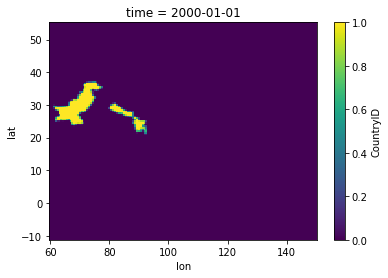

In [97]:
three_countries_05.plot()